In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
from tqdm.notebook import tqdm

In [2]:
#import shapefile
#from shapely.geometry import Polygon
#from descartes.patch import PolygonPatch
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#importem fitxer
df2020=pd.read_csv('files/Bicing_2020.csv')
#OK DADES!!!

In [4]:
#visualitzem la seva dimensió
df2020.shape
#OK DADES!!!

(42107148, 10)

In [5]:
#visualitzem primeres línies
df2020.head()
#OK DADES!!!

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
0,1,21,21,0,23,2020,1,1,0,0
1,2,10,9,1,16,2020,1,1,0,0
2,3,15,15,0,9,2020,1,1,0,0
3,4,8,8,0,13,2020,1,1,0,0
4,5,14,11,3,24,2020,1,1,0,0


In [6]:
#comprovem "range" de la disponibilitat de les bicibletes als dock-stations
stations=np.unique(df2020['num_bikes_available'], return_counts=True)   #retorna els valors únics
stations
#Ok al range que va de 0 (sense disponibilitat) al límit d'un dockstation que són 54.
#OK DADES!!!

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54], dtype=int64),
 array([4094527, 3331187, 2602128, 2180468, 1931287, 1780944, 1675120,
        1630952, 1622720, 1610035, 1602874, 1590921, 1586833, 1543865,
        1527135, 1409124, 1312363, 1215064, 1121253, 1032939,  891469,
         776852,  664817,  611494,  549574,  474932,  406596,  308652,
         164399,  143650,  131807,  113504,   91718,   61456,   42110,
          36452,   31299,   28303,   26488,   22267,   17796,   15717,
          14251,   12494,   10119,    8161,    8004,    7005,    6013,
           6054,    5700,    6058,    4472,    3779,    1947], dtype=int64))

In [7]:
#visualitzem el primer mes per veure la freqüència de bolcatge de dades
# pd.options.display.max_rows = None
df2020[df2020['station_id']==1].sort_values(['station_id','month','day'])
#OK DADES!!!


,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
0,1,21,21,0,23,2020,1,1,0,0
401,1,21,21,0,23,2020,1,1,0,5
802,1,21,21,0,23,2020,1,1,0,10
1203,1,21,21,0,23,2020,1,1,0,15
1604,1,21,21,0,23,2020,1,1,0,20
...,...,...,...,...,...,...,...,...,...,...
42104648,1,43,43,0,3,2020,12,31,23,35
42105148,1,43,43,0,3,2020,12,31,23,40
42105648,1,43,43,0,3,2020,12,31,23,45
42106148,1,43,43,0,3,2020,12,31,23,50


In [8]:
#visualitzem que tots els dies tinguin dades
# pd.options.display.max_rows = None
df2020.groupby(["month","day"])['station_id'].count()
#OK DADES!!!

month  day
1      1      115488
       2      115395
       3      114970
       4      115046
       5      112356
               ...  
12     27     143976
       28     143919
       29     143841
       30     143952
       31     143917
Name: station_id, Length: 319, dtype: int64

In [9]:
df2020[(df2020['month']==4)&(df2020['day']==22)]
#El Bicing reobra el dia 23, per tant, no són lògiques dades del dia 22 a la nit. 
#Corresponen a proves???

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
8631445,2,13,12,1,13,2020,4,22,22,5
8631446,3,14,14,0,13,2020,4,22,22,5
8631447,4,11,7,4,10,2020,4,22,22,5
8631448,5,18,18,0,21,2020,4,22,22,5
8631449,6,20,19,1,19,2020,4,22,22,5
...,...,...,...,...,...,...,...,...,...,...
8636011,435,15,11,4,13,2020,4,22,23,55
8636012,436,11,10,1,8,2020,4,22,23,55
8636013,451,13,11,2,11,2020,4,22,23,55
8636014,454,13,12,1,13,2020,4,22,23,55


In [10]:
df2020[(df2020['month']==3)&(df2020['day']==16)]
#El dia 16 de març cap al migdia es deixen de generar dades. 
#Ok pandèmia, obligació confinament des del 14 de març. Estat d'alarma.

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
8553490,1,31,30,1,15,2020,3,16,0,0
8553491,2,18,16,2,9,2020,3,16,0,0
8553492,3,22,21,1,5,2020,3,16,0,0
8553493,4,13,13,0,8,2020,3,16,0,0
8553494,5,35,35,0,4,2020,3,16,0,0
...,...,...,...,...,...,...,...,...,...,...
8631440,496,11,8,3,6,2020,3,16,15,25
8631441,507,0,0,0,24,2020,3,16,15,25
8631442,508,3,1,2,24,2020,3,16,15,25
8631443,516,1,1,0,20,2020,3,16,15,25


In [11]:
df2020[(df2020['month']==3)&(df2020['day']==15)]
#Idem anterior

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,hour,min
8428248,1,29,29,0,17,2020,3,15,0,0
8428249,2,24,24,0,3,2020,3,15,0,0
8428250,3,7,6,1,20,2020,3,15,0,0
8428251,4,2,2,0,18,2020,3,15,0,0
8428252,5,17,16,1,22,2020,3,15,0,0
...,...,...,...,...,...,...,...,...,...,...
8553485,495,11,10,1,13,2020,3,15,23,55
8553486,496,10,7,3,6,2020,3,15,23,55
8553487,507,3,2,1,21,2020,3,15,23,55
8553488,508,4,1,3,23,2020,3,15,23,55


**Conclusions finals:**

Es registren dades de l'1 de gener fins el dia 16 març (fins al migdia), per tancament del servei.
Es registren dades des del 22 d'abril fins el 31 de desembre.

Incoherència:Tenim registres del dia 22 d'abril, quan el Bicing va obrir oficialment el 23 d'abril.
Hi ha registres de les 20 fins les 23 hores del dia 22 d'abril de 2020.

Proposta: A l'exercici 2020 només seria recomanable incloure només els registres de gener i febrer. La resta estan afectats pels efectes de la pandèmia.

Pels mes de març només hi ha 2 setmanes, en part, ja poden estar afectades per la pandèmia.
El servei es reobra el 23 d'abril de 2020, amb restriccions.
Fins juliol hi ha restriccions de mobilitat per franges horàries.
Al setembre es torna a la normalitat, però a partir d'octubre de 2020 s'estableix un toc de queda a partir de les 10 de la nit fins les 6 de la matinada.

Segons la informació publicada es va incrementar el volum d'abonats del Bicing, tot i que es redueix el volum de viatges realitzats.


**DADES BICING:**

**GENERALS:**

https://www.bicing.barcelona/es/datos-bicing##reference-1

**PANDEMIA COVID-19:**

https://www.lavanguardia.com/local/barcelona/20200422/48679745468/bicing-operativo-coronavirus-guantes.html

Los usuarios del Bicing pueden volver a recurrir a este medio de transporte desde este jueves 23 de abril. Eso sí, aquellos que cojan la bici deberán hacerlo preferiblemente con mascarilla y guantes, que deben tirarse una vez se haya dejado la bici anclada. Las medidas sanitarias establecidas por la Agència de Salut Pública lo establecen como una recomendación, a diferencia de Madrid, donde el BiciMad ha retomado su actividad con los guantes como condición obligatoria.

https://metropoliabierta.elespanol.com/informacion-municipal/movilidad/pandemia-dispara-usuarios-bicing_36839_102.html

El número de usuarios del Bicing se ha disparado con la pandemia. El año pasado se cerró con 126.545 abonados, un 11,2% que en 2019 (113.796). El incremento es el mayor desde 2012 en el servicio de bicicletas de alquiler que puso en marcha el Ayuntamiento en 2007 con Jordi Hereu como alcalde. Los datos aparecen recogidos en el informe Estado de la ciudad 2020: impacto del Covid-19.

El auge del Bicing coincide con un cambio en la forma de desplazarse en Barcelona, una ciudad en la que cada vez hay un mayor uso de la bicicleta y de los Vehículos de Movilidad Personal (VMP), como patinetes. Curiosamente, y aunque pocos se acuerden, el Bicing continúa lejos del número de abonados de 2009. Entonces tenía más de 182.000.

DESCENSO DE LOS VIAJES
Pese al aumento de abonados, los viajes del servicio de alquiler de bicicletas, con 517 estaciones, han bajado un 7,7%, aunque mucho menos que el resto de transportes públicos, donde la caída en 2020 se ha situado cerca del 50%. Según el Ayuntamiento, el descenso es en las bicicletas mecánicas, ya que en las eléctricas --1.700 de las 6.850 que hay en circulación-- los usos han crecido un 60%. Representan uno de cada cuatro viajes.

https://beteve.cat/mobilitat/bicing-recupera-usuaris-abans-pandemia/

El Bicing ja s’ha recuperat de l’aturada per la pandèmia del coronavirus. Segons l’Ajuntament, ja s’han assolit xifres d’usos al nivell de principis d’any. Aquest mes de juliol, s’han superat les xifres del mateix període del 2019, amb més de 1,3 milions d’usos. Segons el primer tinent d’alcalde Jaume Collboni, “en aquest nou context, molts barcelonins estant optant pel Bicing com una forma de transport més”. De fet, durant la desescalada el servei va començar a guanyar usuaris . Una tendència que també ha notat tot l’àmbit de la bicicleta. Les botigues i els tallers de bicicletes afirmen que la pandèmia ha fet créixer molt la demanda d’aquests vehicles.

Més de 18.000 novs altes entre el maig i el juny
Segons informa l’Ajuntament, entre els mesos de maig i juny les noves altes han crescut un 77 % respecte els mateixos mesos de l’any anterior. En total, 18.572 persones s’han donat d’alta del Bicing entre maig i juny. Un 30 % dels usos registrats per aquests nous usuaris corresponen a viatges amb bicicleta elèctrica.

Coronavirus a Catalunya i Barcelona: ÚLTIMA HORA
L’increment de noves altes es fa evident si comparem les xifres d’abonats i abonades totals d’aquest any amb l’anterior: si al juliol de 2019, la xifra era de 110.857, aquest any 2020 s’ha incrementat fins arribar als 125.346.

Jaume Collboni creu que l’augment d’usuaris es deu, entre altres coses, “al pla de noves extensions del Bicing, sobretot als barris de muntanya”. De fet, tot i que la gran majoria de les noves altes provenen dels barris on tradicionalment ja hi havia servei, com Eixample, Ciutat Vella o Sant Martí, segons el consistori ja es nota l’increment d’abonaments als barris nous on fins ara no hi havia estacions, registrant un 12 % d’altes a Horta-Guinardó, Nou Barris i Sant Andreu.

2020 acabarà amb 519 estacions
Durant aquest any s’ha continuat amb la fase d’ampliació del servei. De les 97 estacions noves previstes ja n’han entrat en funcionament 79. En una nota informativa l’Ajuntament ha explicat que de manera progressiva es col·locaran les 18 restants a les seves noves ubicacions. Està previst que el procés finalitzi l’últim trimestre de 2020 amb un total de 519 estacions.

https://www.lavanguardia.com/local/barcelona/20200808/482704741064/bicing-barcelona-covid.html

El primer medio de transporte en recuperar los niveles previos a la pandemia no ha sido ni el coche ni el transporte público, sino la bici. Concretamente, el servicio público de Bicing. Desde el fin del estado de alarma ha sumado 18.572 nuevos abonados y los usos del sistema en el mes de julio han llegado a ser superiores a los del mismo mes del año pasado.

La consecución de registros superiores a los que tenía antes de la irrupción del coronavirus no lo puede decir, de momento, nadie más en el campo de la movilidad urbana. El vehículo privado sigue aún ligeramente por debajo de los desplazamientos considerados hasta entonces normales y el transporte público no levanta cabeza, rondando el 50% de lo que había llegado a ser.

La recuperación del Bicing, en cambio, ha sido particularmente veloz, con una dura caída en marzo y abril –cuando incluso paralizó el servicio durante las semanas más duras del confinamiento– y un rapidísimo crecimiento desde mayo, tocando techo en julio, siendo el mes con más viajes registrados: 1,3 millones. Esa cifra es superior a los desplazamientos realizados con el Bicing en febrero, antes de que el mundo se parase, pero también en comparación con julio del año pasado.

https://bacc.cat/infraestructura-ciclista/urbanisme/2021/movilidad-en-barcelona-evolucion-julio-diciembre-2020/

En septiembre analizamos la movilidad post-covid19 en este artículo que abarcaba la evolución y cambios desde marzo hasta mediados de julio. Desde entonces hemos tenido muchos cambios: un verano sin sobresaltos, la entrada de la ZBE (zona de bajas emisiones), una segunda ola de COVID-19 con nuevas restricciones en octubre… Todo esto ha afectado a la movilidad nuevamente.

La pregunta sigue siendo la misma  ¿realmente ha habido un cambio modal? o ¿era flor de un día? Analicémoslo en detalle.

Fechas importantes:

El 24 de junio se levantó el estado de alarma, permitiendo la movilidad sin límites. Parte de este periodo ya se analizó en el artículo previos.
A partir del 7 de septiembre comenzó la vuelta ‘al cole’ y con ello, el retorno a las oficinas y trabajos de manera más o menos física.
El 25 de octubre se implantaron nuevas restricciones a razón del estado de alarma. Se establece un ‘toque de queda’ de 22:00h a 06:00h con cierre perimetral de viernes a lunes.
El 23 de noviembre comienza la 2ª desescalada, con la re-apertura de bares y reducción de restricciones en comercios. Hasta Navidades, donde se establecieron nuevas restricciones.
 

LAS BICICLETAS SON PARA EL VERANO
A partir de julio, y con el comienzo de la temporada estival la movilidad en general comenzó a reducirse. En general durante julio, la bicicleta se mantuvo en crecimiento neto (4-5%) en días laborales con picos de +20% en fines de semana. Parece que la tendencia del uso para ocio (bien deporte o desplazamientos a tiendas, bares…) los fines de semana sigue. Los picos se mantuvieron también durante agosto.

A destacar que durante este mes Bicing (que en septiembre disponía de un 20% más de abonados desde enero 2020) superó en valor absoluto el número total de viajes realizados por mes con un total de 1,3 millones de usos. Es decir, sube el uso de los carriles bici donde hay aforos, pero también sube el uso del bicing.

Durante agosto, siguieron los picos en fines de semana, pero la movilidad en laboral se redujo, en todos los medios: transporte público, bicicleta y por supuesto, también en el coche. Agosto no es el mejor mes para la movilidad urbana.  El uso de la bicicleta baja hasta un 25% y el tráfico dentro de Barcelona un 40%, con mínimos la 3ª semana de agosto.

Según datos del MITMA (ministerio de transportes, movilidad y agenda urbana) entre finales de julio y agosto la movilidad en general (incluyendo la movilidad a pie) dentro de Barcelona se redujo un 20%, por lo que la bajada del uso de bici y coche, es coherente.

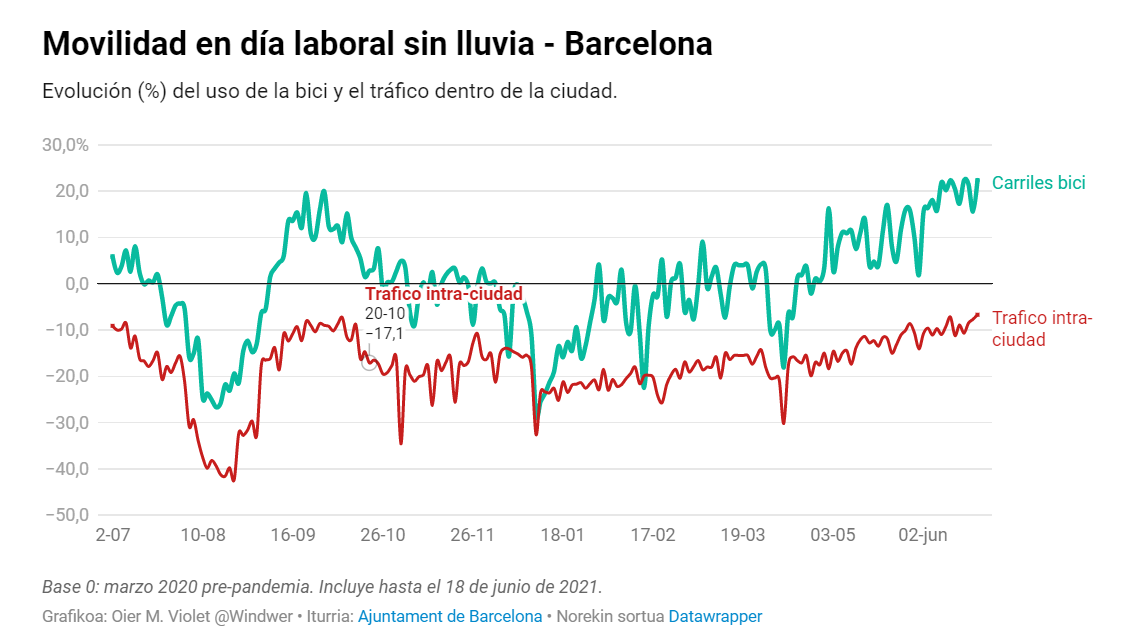



 

VUELTA AL COLE
Y con la vuelta a la actividad, se recuperó la movilidad de manera equilibrada entre los medios, hecho que ya es normal. Aun así, la bicicleta despuntó en la vuelta al cole terminando el mes con un incremento del 20% en día laboral y 50% en fin de semana. Esto supone pasar a contar en los aforos 34.600 bicicletas más en día laboral y  86.000 más en fines de semana. ¡Casi nada!

El coche (por suerte) no ha recuperado el 100% de uso previo a la pandemia y se mantuvo un 10% por debajo del valor previo. En cifras, esto supone 150.000 viajes menos en coche en Barcelona. 

¡Ojo! Este efecto no es debido a la entrada en funcionamiento de la ZBE (zona de bajas emisiones) el 15/09. Es posible que algún conductor sea más consciente y haya dejado el coche en casa (o lo haya vendido) pero la reducción del uso del coche en Barcelona y que no haya recuperado su uso lleva siendo consistente desde mayo.

El transporte público, post-parón de verano y con un 100% de oferta (en zona metropolitana de Barcelona)  por desgracia sigue plano con una caída del 40%. Resulta curioso que desde el fin del primer confinamiento no ha recuperado casi demanda.

 


